In [0]:
import pandas as pd
import numpy as np
import eli5

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from eli5.sklearn import PermutationImportance

In [4]:
cd'/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


## Wczytywanie danych

In [5]:
df = pd.read_hdf('data/car.hd5')
df.shape

(106494, 155)

Dummy Model

In [7]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [10]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()    # tworzenie nowego modelu
model.fit(X,y)              # model zaczyna się drenować, zwraca średnią
y_pred = model.predict(X)   # prognozowanie

mae(y, y_pred)              #benchmark do dalszych optymalizacji (średni bład)

39465.934630440985

In [15]:
[x for x in df.columns if 'price' in x]   # które kolumny mają 'price' w nazwie

['price_currency', 'price_details', 'price_value']

In [16]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [17]:
df = df [df['price_currency'] != 'EUR' ]
df.shape

(106290, 155)

#Features

In [20]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = factorized_values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [27]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-16355.976788879481

In [0]:
def bars(feat_groupby, feat_agg='price_value', agg_func=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return(
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_func)
      .sort_values(by=feat_sort, ascending=False) 
      .head(top)

  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

In [30]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y )

imp = PermutationImportance(m, random_state=0).fit(X, y)
eli5.show_weights(imp, feature_names = cat_feats)

Weight,Feature
0.1956 ± 0.0054,param_faktura-vat__cat
0.1903 ± 0.0027,param_napęd__cat
0.1815 ± 0.0087,param_stan__cat
0.1512 ± 0.0078,param_rok-produkcji__cat
0.0928 ± 0.0019,param_skrzynia-biegów__cat
0.0607 ± 0.0051,param_moc__cat
0.0436 ± 0.0015,feature_kamera-cofania__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0162 ± 0.0004,feature_bluetooth__cat
0.0110 ± 0.0007,feature_łopatki-zmiany-biegów__cat


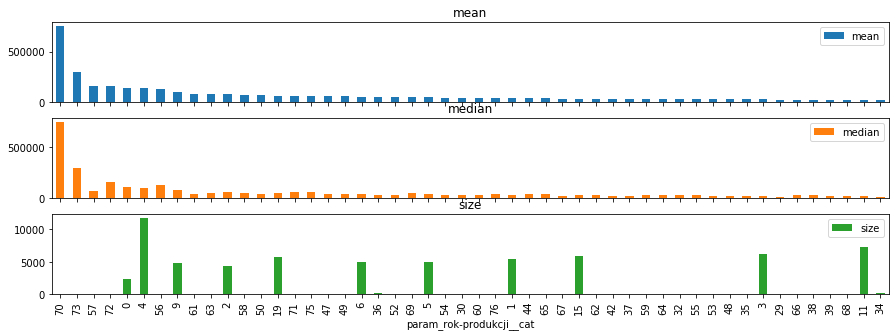

In [38]:
bars('param_rok-produkcji__cat');